In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:]
Y = iris.target

In [2]:
class FuzzyCMeans(object):
    def __init__(self, data, n_class):
        self.data = data
        self.n_class = n_class
        self.U = self.init_U()
        self.centroid = np.zeros((n_class, data.shape[1]))
        self.EPS = 1e-5
    
    #初始化隶属度矩阵U
    def init_U(self):
        U = np.random.rand(self.data.shape[0], self.n_class)  # 先生成随机矩阵
        sumU = 1 / np.sum(U, axis=1)   # 求每行的和
        U = np.multiply(U.T, sumU)   # 使隶属度矩阵每一行和为1
        return U.T
    
    # 计算样本和簇中心的距离，这里使用欧氏距离
    def distance(self, centroid):
        return np.sqrt(np.sum((self.data - centroid)**2, axis=1))
    
    #计算隶属度矩阵U
    def computeU(self, data, m=2):
        sampleNumber = data.shape[0]  # 样本数
        U = np.zeros((sampleNumber, self.n_class))
        # 更新隶属度矩阵
        for i in range(self.n_class):
            U[:, i] += (self.distance(self.centroid[i])) ** (-2 / (m - 1))
        sumU = 1 / np.sum(U, axis = 1)
        U = np.multiply(U.T, sumU).T
        return U
    
    #调整聚类中心
    def adjustCentroid(self, m=2):
        for i in range(self.n_class):
            self.centroid[i] = np.dot(self.U[:, i]**m, self.data)/ np.sum(self.U[:, i]**m)
    
    #Fuzzy CMeans聚类
    def cluster(self):
        while True:
            U_old = self.U
            self.adjustCentroid()
            self.U = self.computeU(self.data)
            if np.max(np.abs(self.U - U_old)) < self.EPS:
                return 
    
    #预测
    def predict(self, test_data):
        U = self.computeU(test_data)
        labels = np.argmax(U, axis=1)
        return labels

In [3]:
cmeans = FuzzyCMeans(X, 3)

In [4]:
cmeans.cluster()
cmeans.centroid

array([[6.77500367, 3.05238007, 5.64677237, 2.05354303],
       [5.88892612, 2.76106711, 4.36394252, 1.39731034],
       [5.00396595, 3.41408917, 1.48281503, 0.25354609]])

In [5]:
labels = cmeans.predict(X)

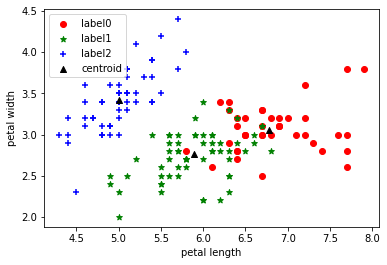

In [6]:
import matplotlib.pyplot as plt
#绘制k-means结果
x0 = X[labels == 0]
x1 = X[labels == 1]
x2 = X[labels == 2]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='+', label='label2')
plt.scatter(cmeans.centroid[:,0], cmeans.centroid[:,1], c = "black", marker='^', label='centroid')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='best')
plt.show()

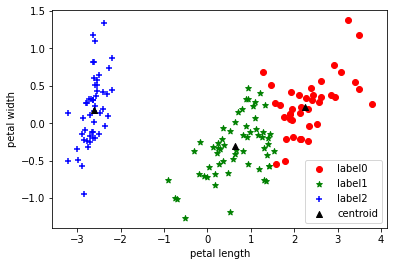

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # n_components 生成特征的维度，这里我们生成2维
pca.fit(X) #pca训练
#训练后将数据降维至2维
X_pca = pca.transform(X)
centroid_pca = pca.transform(cmeans.centroid)
#绘制k-means结果
x0 = X_pca[labels == 0]
x1 = X_pca[labels == 1]
x2 = X_pca[labels == 2]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
plt.scatter(x2[:, 0], x2[:, 1], c = "blue", marker='+', label='label2')
plt.scatter(centroid_pca[:,0], centroid_pca[:,1], c = "black", marker='^', label='centroid')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='best')
plt.show()